In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
digits = pd.read_csv("../data/mnist.csv")
digits.shape

(900, 6)

In [4]:
digits["true_label"].value_counts()

true_label
4    90
2    90
1    90
3    90
5    90
6    90
7    90
8    90
9    90
0    90
Name: count, dtype: int64

<Axes: xlabel='true_label', ylabel='Count'>

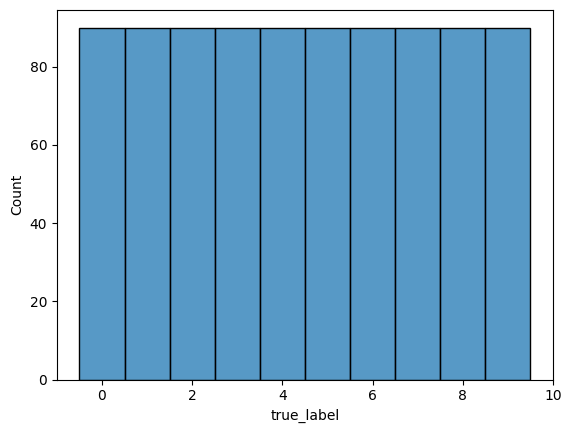

In [5]:
sns.histplot(digits, x="true_label", discrete=True)

## September

In [6]:
# get confidence distribution
sept = digits[digits["timestamp"].str[:2] == "09"]
oct = digits[digits["timestamp"].str[:2] == "10"]
nov = digits[digits["timestamp"].str[:2] == "11"]

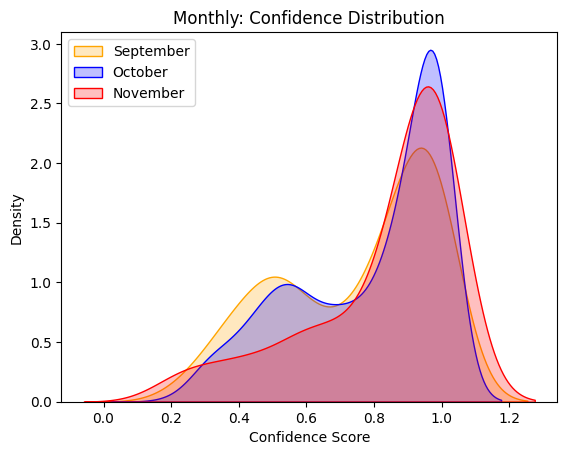

In [7]:
sns.kdeplot(sept, x="confidence", color="orange", fill=True, label="September")
sns.kdeplot(oct, x="confidence", color="blue", fill=True, label="October")
sns.kdeplot(nov, x="confidence", color="red", fill=True, label="November")
plt.title("Monthly: Confidence Distribution")  # no retrain at this point
plt.xlabel("Confidence Score")
plt.ylabel("Density")
plt.legend()

In [24]:
# dimensionality reduction preprocessing
import numpy as np
from PIL import Image

def load_image_as_vector(path):
    path = f".{path}"
    img = Image.open(path).convert("L")  # grayscale
    img = img.resize((28, 28))
    arr = np.array(img).flatten() / 255.0  # normalize
    return arr

# create matrix of image vectors
image_vectors = np.stack([load_image_as_vector(p) for p in digits["img_path"]])
print(image_vectors.shape)  # (n_samples, 784)


# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_vectors)

digits["pca1"] = pca_result[:, 0]
digits["pca2"] = pca_result[:, 1]

# TSNE analysis
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(image_vectors)

digits["tsne1"] = tsne_result[:, 0]
digits["tsne2"] = tsne_result[:, 1]




(900, 784)


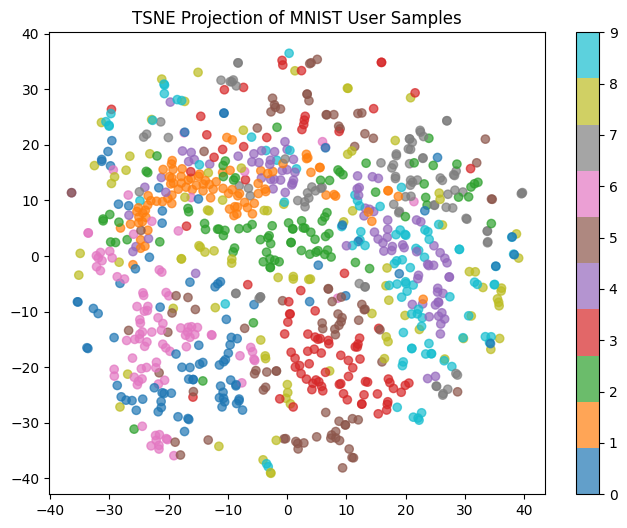

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(digits["tsne1"], digits["tsne2"], c=digits["true_label"], cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("TSNE Projection of MNIST User Samples")
plt.show()


In [22]:
tsne = TSNE(n_components=3, perplexity=40, n_iter=2000)
tsne_result = tsne.fit_transform(image_vectors)
print(tsne_result)

[[ -3.02402    -9.21952    25.494099 ]
 [ 14.0318365 -35.99107    60.04343  ]
 [-28.139864   15.901824  -68.023346 ]
 ...
 [  9.998924  -63.872284   -5.890001 ]
 [ 22.812712   -6.0124474 -43.57917  ]
 [ 15.400966   54.01828    14.506223 ]]


0      4
1      2
2      1
3      1
4      1
      ..
895    5
896    6
897    7
898    8
899    9
Name: true_label, Length: 900, dtype: int64


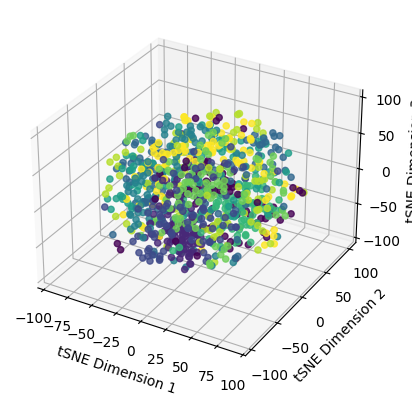

In [23]:
# graph visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = digits.true_label
print(colors)
ax.scatter(
    tsne_result[:,0],
    tsne_result[:,1],
    tsne_result[:,2],
    c=colors,
    cmap="viridis",
    alpha=0.8
)

ax.set_xlabel("tSNE Dimension 1")
ax.set_ylabel("tSNE Dimension 2")
ax.set_zlabel("tSNE Dimension 3")
plt.show()